# Visualize and Plot results

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
cmap = plt.get_cmap('tab10')
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme()

import json

data_path = "./data/"

#### Entanglement scaling

In [7]:
ent_path = data_path + "ent_scaling/"
idx_run = "2022-02-07_23-00-40_574_10"

ent_data = np.load(ent_path + idx_run + ".npy", allow_pickle=True)
with open(ent_path + idx_run + '.json') as file:
    ent_metadata = json.load(file)
print(ent_metadata)

{'max_num_qubits': 10, 'backend': 'Aer', 'alternate': True, 'fmap': 'ZZFeatureMap-81', 'fmap_entanglement': 'linear', 'var_ansatz': 'TwoLocal-267', 'var_entanglement': 'linear'}


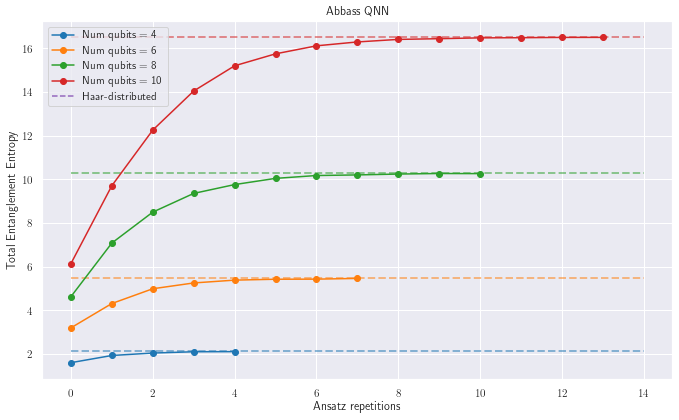

In [8]:
fig = plt.figure(figsize=(9.6, 6))
plt.title(f"Abbass QNN")
plt.ylabel("Total Entanglement Entropy")
plt.xlabel("Ansatz repetitions")

for idx, data in enumerate(ent_data):
    plt.hlines(data[1], 0, len(ent_data[-1][0]), ls="--", color=cmap(idx), lw = 2, alpha = 0.5)
    plt.plot(data[0], ls="-", marker="o", c=cmap(idx), label=f"Num qubits = {2*(idx+1)+2}")

plt.plot([],[], ls ='--', color = cmap(idx+1), label = "Haar-distributed")

plt.legend()
plt.tight_layout()
#plt.savefig(ent_path + "/Imgs/" + idx_run + ".pdf", format = "pdf")


### Optimal repetition

In [17]:
idx_run = "10_linear"
reps_data = np.load(data_path+"optimal_reps/" + idx_run + ".npz")

x = reps_data['x']
y = reps_data['y']
q = reps_data['q'] # intercept
m = reps_data['m'] # slope

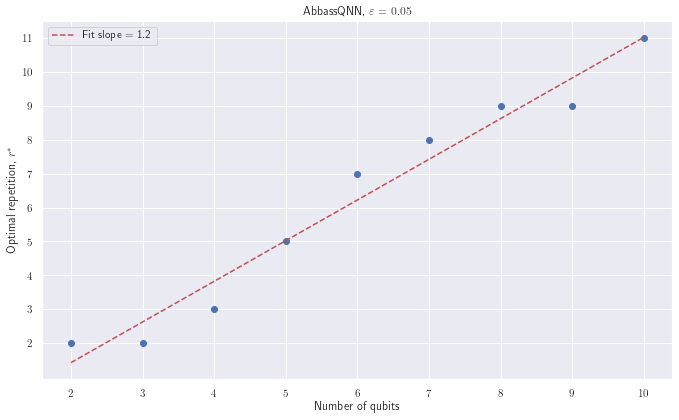

In [18]:
fig = plt.figure(figsize=(9.6, 6))

plt.title(fr"AbbassQNN, $\varepsilon={0.05}$")
plt.xlabel("Number of qubits")
plt.ylabel(fr"Optimal repetition, $r^*$")

plt.xticks(range(min(x), max(x)+1))
plt.yticks(range(min(y), max(y)+1))

plt.scatter(x, y, marker='o')
plt.plot(x, q + m * x, 'r', ls='--',
         label=f'Fit slope = {np.round(m,3)}')

plt.legend()
plt.tight_layout()

#### [Random] Circuits plot 

In [1]:
from circuits import *

num_qubits = 4
alternate = True
num_reps = 1

# Select circuit
# ansatz = Abbas_QNN(num_qubits, reps=num_reps, alternate=alternate, barrier=True)  # AbbassQNN
#feature_map = ring_circ(num_qubits, num_reps = 1, barrier=False) # Ring circ
feature_map = piramidal_circuit(num_qubits=, num_reps=1, barrier=False)
#feature_map = ZZFeatureMap(num_qubits, reps=1, entanglement='linear')
#feature_map = TwoLocal(num_qubits, 'rx', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)
var_ansatz = TwoLocal(num_qubits, 'ry', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)

ansatz = general_qnn(num_reps, feature_map=feature_map,
                     var_ansatz=var_ansatz, alternate=alternate, barrier=False)

print(len(ansatz.parameters))
print(ansatz.decompose())


12
     ┌─────────────┐                                        ┌─────────────┐»
q_0: ┤ R(x[0],π/2) ├──■─────────────────────────────■───────┤ R(x[4],π/2) ├»
     ├─────────────┤  │                           ┌─┴─┐     ├─────────────┤»
q_1: ┤ R(x[1],π/2) ├──┼──────────────■────────────┤ X ├─────┤ R(x[5],π/2) ├»
     ├─────────────┤  │            ┌─┴─┐     ┌────┴───┴────┐└────┬───┬────┘»
q_2: ┤ R(x[2],π/2) ├──┼────■───────┤ X ├─────┤ R(x[6],π/2) ├─────┤ X ├─────»
     ├─────────────┤┌─┴─┐┌─┴─┐┌────┴───┴────┐└─────────────┘     └─┬─┘     »
q_3: ┤ R(x[3],π/2) ├┤ X ├┤ X ├┤ R(x[7],π/2) ├──────────────────────■───────»
     └─────────────┘└───┘└───┘└─────────────┘                              »
«          ┌───┐┌───────────┐                                    
«q_0: ──■──┤ X ├┤ Ry(θ0[0]) ├───────────────────■────────────────
«       │  └─┬─┘└───┬───┬───┘┌───────────┐    ┌─┴─┐              
«q_1: ──┼────■──────┤ X ├────┤ Ry(θ0[1]) ├────┤ X ├──────■───────
«       │           └─┬─┘    └───┬───┬──

In [4]:
import numpy as np
np.round([1.3333334453,0.72234345], 3)

array([1.333, 0.722])

In [43]:
import qiskit as qk

qc = qk.QuantumCircuit(2, name = "mario", entan = "pippo", metadata = {"lullo": "mario"})

di = dict({"mario": 4, "carlo": 3})
qc.metadata = di
qc.metadata


TypeError: __init__() got an unexpected keyword argument 'entan'

In [44]:
qc.entan

AttributeError: 'QuantumCircuit' object has no attribute 'entan'

In [6]:
    qc.metadata

{'name': 'mario', 'mario2': 'carlO'}

In [8]:
qc.metadata

{'mario': 2, 'carlo': 3}